<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/embed_stability_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Figure 11: Nonlinear projections introduce distortions in simulated data.

In this notebook, we simulate the tripotent $AB(C/D/E)$ system, analyze it using the standard `velocyto` workflow, and investigate the resulting velocity fields and broad trends in cell placement.

# Dependencies

In [11]:
import time
t1 = time.time()

In [12]:
## uncomment this cell if run in colab ##

%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy umap-learn

In [13]:
from vis import *

In [14]:
## run locally ##
# %cd ../../GFCP_2021
# from vis import * 
# %cd notebooks

# Generate data and preprocess

In [15]:
from os.path import exists

plt.rcParams.update({'font.size': 22})

Simulate topology.

In [16]:
!mkdir -p data
!mkdir -p figure

In [17]:
nCells,nGenes,T,tau,topo =  2000,100,10,[0,3,7],"ab(c/d/e)"
filename="data/simdata_abcde"
meta = nCells,nGenes,T,tau,topo
if not exists(filename):
    simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=42)
    sim_export(simdata,meta,filename)

In [18]:
vlm = vcy.VelocytoLoom(loom_filepath=filename+'.loom')

preprocess(vlm,sim=True,meta=meta,filter=False,sz_normalize=False)

# Generate figure 11

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


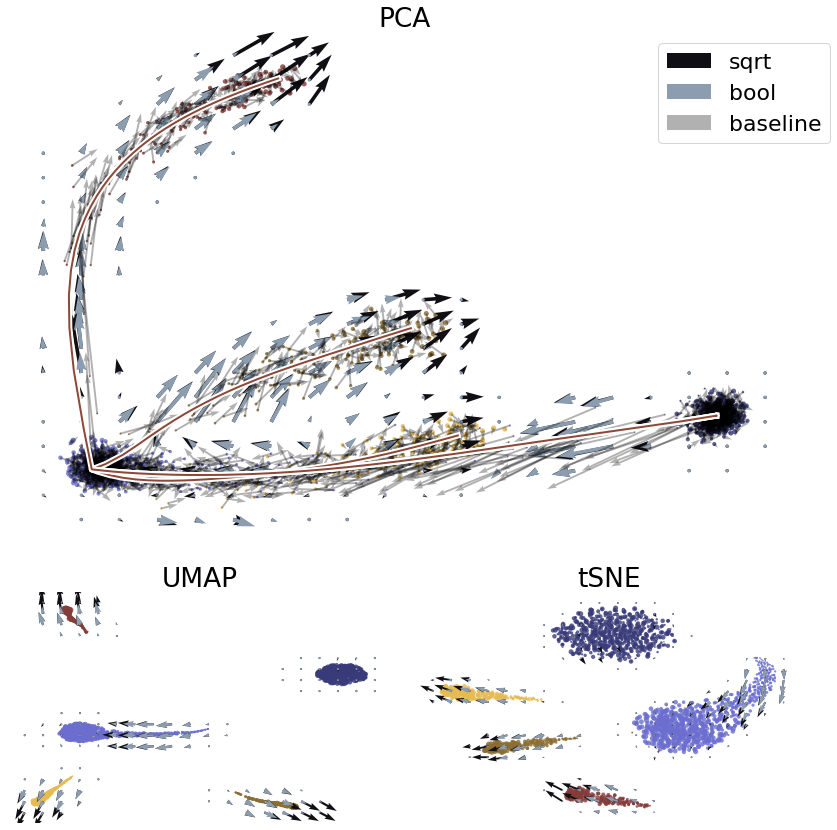

In [19]:
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid((3, 2), (2, 0))
ax3 = plt.subplot2grid((3, 2), (2, 1))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="PCA",meta=meta,sim=True,ax=ax1,quiver_scale=20,legend=True,steps=(20,20))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="UMAP",meta=meta,sim=True,ax=ax2,quiver_scale=20,legend=False,steps=(20,20))
gridArrowPlots(vlm,Trans=["sqrt","bool"],embed="tSNE",meta=meta,sim=True,ax=ax3,quiver_scale=20,legend=False,steps=(20,20))
fig.tight_layout()
fig.savefig('figure/embed_stability_sim_raw.png',dpi=600)

In [20]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 139.05 seconds.
